## Lets discuss about Air Quality 

Air Quality is one of the important aspects of day to day life.Air Quality is included in the action plans promoted by the Ministry of Health to reduce
population exposure to air pollution. Recent studies indicate that The 2020 National Energy Strategy could prevent 17%
of the PM2.5, and 57% of the NO2 attributable deaths.
Compliance with the EU Directive 50/2008 with a 2005 baseline situation could reduce attributable mortality due to
PM2.5 or NO2 by around 20% (30% in urban areas).Humidity and temperature are two important compenents of Air.
Humidity is the concentration of water vapor present in the air.The amount of water vapor contained within a parcel of air can vary significantly. 
For example, a parcel of air near saturation may contain 28 g (0.99 oz) of water per cubic metre of air at 30 °C (86 °F),
 but only 8 g (0.28 oz) of water per cubic metre of air at 8 °C (46 °F).
Absolute humidity describes the water content of air and is expressed in either grams per cubic metre[2] or grams per kilogram.
We have taken a dataset which contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 
The device was located on the field in a significantly polluted area, at road level,within an Italian city. 
Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.
Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located
reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008
 (citation required) eventually affecting sensors concentration estimation capabilities.This dataset can be used exclusively for research.
 
 <img src="airquality.jpg" width=400 />


In [66]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [68]:
airUCI = pd.read_csv("/content/AirQualityUCI.csv", sep = ";", decimal = ",")

# Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


# Attribute Information:
0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

In [69]:
airUCI.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76,nan,nan
1,10/03/2004,19.00.00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73,nan,nan
2,10/03/2004,20.00.00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75,nan,nan
3,10/03/2004,21.00.00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79,nan,nan
4,10/03/2004,22.00.00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79,nan,nan


# Data Cleaning

In [71]:
airUCI = airUCI.drop(["Unnamed: 15", "Unnamed: 16"], axis = 1)

Checking all the columns in our dataset

In [72]:
airUCI.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Renaming the columns to make our analysis easier

In [73]:
df = airUCI
df = df.rename(columns={"CO(GT)": "COGT", "PT08.S1(CO)": "PT08S1", "NMHC(GT)": "NMHC", "C6H6(GT)" : "C6H6", "PT08.S2(NMHC)": "PT08S2", "NOx(GT)": "NOxGT", "PT08.S3(NOx)":"PT08S3", "NO2(GT)":"NO2GT", "PT08.S4(NO2)": "PT08S4", "PT08.S5(O3)":"PT08S5" })

We see in our dataset that the missing values are represented with -200 value, which is really absurd and will impact our analysis. So I decided to replace that value with the mean of column to minimize the effect that it can have on our analysis

In [74]:
for col in df.columns:
    if(col == 'Date' or col == 'Time'):
        continue
    df[col] = df[col].replace(-200,float(np.NaN))
    df[col] = df[col].fillna(df[col].mean())

Converting Date Column to Datetime

In [75]:
df["Date"] = pd.to_datetime(df["Date"])

In [76]:
df

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
0,2004-10-03,18.00.00,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
1,2004-10-03,19.00.00,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2,2004-10-03,20.00.00,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
3,2004-10-03,21.00.00,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
4,2004-10-03,22.00.00,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaT,NaN,2.15,"1,099.83",218.81,10.08,939.15,246.90,835.49,113.09,"1,456.26","1,022.91",18.32,49.23,1.03
9467,NaT,NaN,2.15,"1,099.83",218.81,10.08,939.15,246.90,835.49,113.09,"1,456.26","1,022.91",18.32,49.23,1.03
9468,NaT,NaN,2.15,"1,099.83",218.81,10.08,939.15,246.90,835.49,113.09,"1,456.26","1,022.91",18.32,49.23,1.03
9469,NaT,NaN,2.15,"1,099.83",218.81,10.08,939.15,246.90,835.49,113.09,"1,456.26","1,022.91",18.32,49.23,1.03


In [77]:
df['Date'].value_counts()

2004-09-07    24
2004-12-29    24
2004-10-28    24
2004-05-23    24
2004-03-27    24
              ..
2004-07-31    24
2004-11-09    24
2004-06-04    24
2005-04-04    15
2004-10-03     6
Name: Date, Length: 391, dtype: int64

As we can see that each date is recorded 24 times, indicating that the data is recorded with period of 1 hour. It doesn't make sense if we continue our analysis considering all the values at a time. So I divided the data into three quaters of the day.

dfFQ is first Quater of the day from 12 am to 8 am

dfSQ is Second Quater of the day from 8 am to 4 pm

dfTQ is Third Quater of the day from 4pm to 12 am

Dividing out data in these Quaters makes sense as the Temparature behaves uniformly in these Quaters making our prediction more senseful and accurate.

In [78]:
dfFQ = df[(df["Time"]<= "08.00.00") & (df["Time"]> "00.00.00")]
dfSQ = df[(df["Time"]<= "16.00.00") & (df["Time"]> "08.00.00")]
dfTQ = df[(df["Time"]<= "23.00.00") & (df["Time"]> "16.00.00")]
dfSQ.head()

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
15,2004-11-03,09.00.00,2.20,"1,351.00",87.00,9.50,960.00,129.00,"1,079.00",101.00,"1,583.00","1,028.00",10.50,60.60,0.77
16,2004-11-03,10.00.00,1.70,"1,233.00",77.00,6.30,827.00,112.00,"1,218.00",98.00,"1,446.00",860.00,10.80,58.40,0.76
17,2004-11-03,11.00.00,1.50,"1,179.00",43.00,5.00,762.00,95.00,"1,328.00",92.00,"1,362.00",671.00,10.50,57.90,0.74
18,2004-11-03,12.00.00,1.60,"1,236.00",61.00,5.20,774.00,104.00,"1,301.00",95.00,"1,401.00",664.00,9.50,66.80,0.80
19,2004-11-03,13.00.00,1.90,"1,286.00",63.00,7.30,869.00,146.00,"1,162.00",112.00,"1,537.00",799.00,8.30,76.40,0.84


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


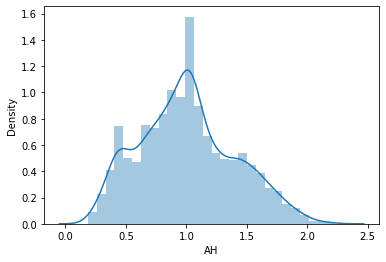

In [79]:
sns.distplot(dfSQ['AH'], kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


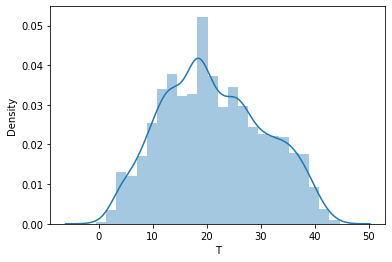

In [80]:
sns.distplot(dfSQ['T'], kde = True)

Here we can see that there are data points in our data set that are causing our data to skew towards right. This skewing might effect our Process

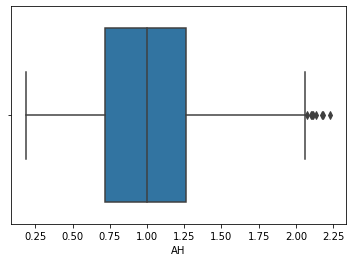

In [81]:
sns.boxplot(x = dfSQ["AH"])

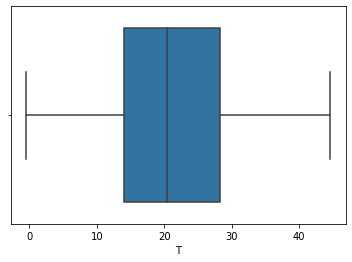

In [82]:
sns.boxplot(x = dfSQ["T"])

In [83]:
dfSQ["AH"].describe()

count   3,118.00
mean        1.00
std         0.39
min         0.19
25%         0.72
50%         1.00
75%         1.26
max         2.23
Name: AH, dtype: float64

In [84]:
dfSQ["T"].describe()

count   3,118.00
mean       21.33
std         9.38
min        -0.50
25%        14.00
50%        20.40
75%        28.20
max        44.60
Name: T, dtype: float64

 as we can see in out dataset, for absolute humidity values there are outliers are present which might effect our analysis. lets see hoe many data points are present outside two times of our standard Deviation.

In [87]:
dfSQ["AH"].mean()

1.00450025361403

In [88]:
dfSQ["AH"].mean() + 2* dfSQ["AH"].std()

1.7924434320401605

In [90]:
dfSQ[dfSQ["AH"] > (dfSQ["AH"].mean() + 2.5* dfSQ["AH"].std())]

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
3550,2004-05-08,16.00.00,2.15,"1,067.00",218.81,7.00,855.00,90.00,748.00,102.00,"1,700.00",811.00,23.90,69.10,2.02
3567,2004-06-08,09.00.00,2.90,"1,229.00",218.81,16.30,"1,188.00",237.00,557.00,97.00,"2,033.00","1,412.00",24.50,66.20,2.00
3618,2004-08-08,12.00.00,1.40,"1,032.00",218.81,4.60,744.00,87.00,813.00,79.00,"1,695.00",778.00,25.40,68.00,2.18
3687,2004-11-08,09.00.00,1.80,"1,165.00",218.81,9.70,967.00,93.00,651.00,58.00,"1,825.00","1,120.00",29.80,51.10,2.11
3688,2004-11-08,10.00.00,1.80,"1,179.00",218.81,9.50,957.00,105.00,680.00,67.00,"1,819.00","1,131.00",33.60,41.00,2.10
3689,2004-11-08,11.00.00,1.70,"1,144.00",218.81,8.30,913.00,89.00,715.00,68.00,"1,782.00",972.00,35.10,38.10,2.11
3690,2004-11-08,12.00.00,1.30,"1,066.00",218.81,6.00,813.00,63.00,792.00,56.00,"1,657.00",764.00,36.20,34.90,2.06
3691,2004-11-08,13.00.00,1.30,"1,056.00",218.81,5.80,802.00,52.00,824.00,47.00,"1,620.00",670.00,38.00,30.70,2.00
3711,2004-12-08,09.00.00,1.90,"1,126.00",218.81,9.50,957.00,122.00,694.00,71.00,"1,841.00","1,034.00",29.40,53.10,2.14
3712,2004-12-08,10.00.00,1.50,"1,066.00",218.81,6.90,855.00,101.00,803.00,61.00,"1,712.00",929.00,33.40,39.90,2.02


The outlier points of absolute humidity in our dataset as above and they are very less compare to number of data points we have. i.e Approximately 15 our of 3118 data points

# Handeling Outliers

In [91]:
dfSQ = dfSQ[dfSQ["AH"] < (dfSQ["AH"].mean() + 2.5* dfSQ["AH"].std())]
dfSQ

,Date,Time,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
15,2004-11-03,09.00.00,2.20,"1,351.00",87.00,9.50,960.00,129.00,"1,079.00",101.00,"1,583.00","1,028.00",10.50,60.60,0.77
16,2004-11-03,10.00.00,1.70,"1,233.00",77.00,6.30,827.00,112.00,"1,218.00",98.00,"1,446.00",860.00,10.80,58.40,0.76
17,2004-11-03,11.00.00,1.50,"1,179.00",43.00,5.00,762.00,95.00,"1,328.00",92.00,"1,362.00",671.00,10.50,57.90,0.74
18,2004-11-03,12.00.00,1.60,"1,236.00",61.00,5.20,774.00,104.00,"1,301.00",95.00,"1,401.00",664.00,9.50,66.80,0.80
19,2004-11-03,13.00.00,1.90,"1,286.00",63.00,7.30,869.00,146.00,"1,162.00",112.00,"1,537.00",799.00,8.30,76.40,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.10,"1,314.00",218.81,13.50,"1,101.00",472.00,539.00,190.00,"1,374.00","1,729.00",21.90,29.30,0.76
9353,2005-04-04,11.00.00,2.40,"1,163.00",218.81,11.40,"1,027.00",353.00,604.00,179.00,"1,264.00","1,269.00",24.30,23.70,0.71
9354,2005-04-04,12.00.00,2.40,"1,142.00",218.81,12.40,"1,063.00",293.00,603.00,175.00,"1,241.00","1,092.00",26.90,18.30,0.64
9355,2005-04-04,13.00.00,2.10,"1,003.00",218.81,9.50,961.00,235.00,702.00,156.00,"1,041.00",770.00,28.30,13.50,0.51



Now our data of absolute Humidity is free from outliers

# correlation matrix

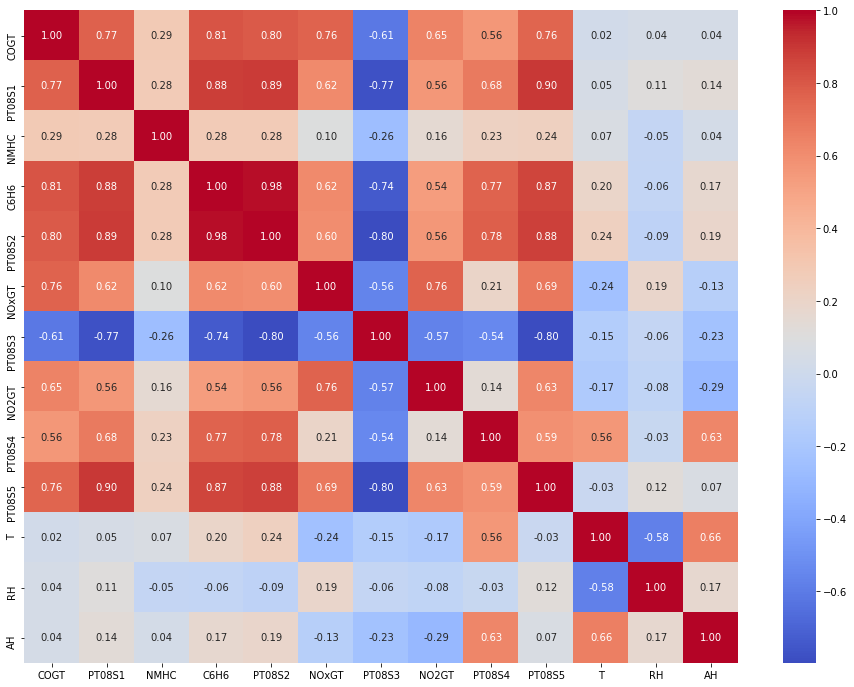

In [92]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

In [93]:
pip install dcor

In [94]:
import dcor
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)


In [95]:
# Create the distance method using distance_correlation
data2 = dfSQ.drop(labels = ["Date","Time"], axis = 1)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data2.apply(lambda col1: data2.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

,COGT,PT08S1,NMHC,C6H6,PT08S2,NOxGT,PT08S3,NO2GT,PT08S4,PT08S5,T,RH,AH
COGT,1.00,0.74,0.25,0.78,0.78,0.75,0.64,0.61,0.48,0.77,0.24,0.37,0.14
PT08S1,0.74,1.00,0.24,0.84,0.83,0.56,0.77,0.46,0.60,0.88,0.21,0.43,0.23
NMHC,0.25,0.24,1.00,0.23,0.22,0.17,0.24,0.16,0.23,0.20,0.12,0.04,0.16
C6H6,0.78,0.84,0.23,1.00,1.00,0.56,0.75,0.48,0.69,0.87,0.15,0.27,0.24
PT08S2,0.78,0.83,0.22,1.00,1.00,0.54,0.76,0.48,0.70,0.87,0.15,0.25,0.25
NOxGT,0.75,0.56,0.17,0.56,0.54,1.00,0.63,0.73,0.15,0.68,0.42,0.46,0.12
PT08S3,0.64,0.77,0.24,0.75,0.76,0.63,1.00,0.54,0.43,0.81,0.16,0.40,0.26
NO2GT,0.61,0.46,0.16,0.48,0.48,0.73,0.54,1.00,0.16,0.58,0.35,0.20,0.27
PT08S4,0.48,0.60,0.23,0.69,0.70,0.15,0.43,0.16,1.00,0.51,0.48,0.14,0.67
PT08S5,0.77,0.88,0.20,0.87,0.87,0.68,0.81,0.58,0.51,1.00,0.23,0.42,0.15


As we can see from the correlation table that out dependent variable is highly correlated with PT08S4(Tungton Oxide), Temparature and NO2 content of the air

In [96]:
dfSQforAnalysis = dfSQ[["PT08S4", "AH", "NO2GT", "T"]]
dfSQforAnalysis

,PT08S4,AH,NO2GT,T
15,"1,583.00",0.77,101.00,10.50
16,"1,446.00",0.76,98.00,10.80
17,"1,362.00",0.74,92.00,10.50
18,"1,401.00",0.80,95.00,9.50
19,"1,537.00",0.84,112.00,8.30
...,...,...,...,...
9352,"1,374.00",0.76,190.00,21.90
9353,"1,264.00",0.71,179.00,24.30
9354,"1,241.00",0.64,175.00,26.90
9355,"1,041.00",0.51,156.00,28.30


# Model 1: processing out: model with Randomforest Algorithm

In [97]:
X = dfSQforAnalysis.drop(['AH'], axis=1)
X

,PT08S4,NO2GT,T
15,"1,583.00",101.00,10.50
16,"1,446.00",98.00,10.80
17,"1,362.00",92.00,10.50
18,"1,401.00",95.00,9.50
19,"1,537.00",112.00,8.30
...,...,...,...
9352,"1,374.00",190.00,21.90
9353,"1,264.00",179.00,24.30
9354,"1,241.00",175.00,26.90
9355,"1,041.00",156.00,28.30


In [98]:
y = dfSQforAnalysis[["AH"]]
y

,AH
15,0.77
16,0.76
17,0.74
18,0.80
19,0.84
...,...
9352,0.76
9353,0.71
9354,0.64
9355,0.51


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7236262333009706

In [101]:
y_pred = rf_model.predict(X_test)

In [102]:
y_test2 = y_test.to_numpy()

In [103]:
print(y_pred[0:10])
print(y_test2[0:10])

[1.480297   0.645343   1.0414363  1.5747955  1.04868175 1.361193
 1.01522312 1.0623028  1.00965    1.5048    ]
[[1.4499    ]
 [0.4599    ]
 [1.0724    ]
 [1.1271    ]
 [1.4487    ]
 [1.4653    ]
 [1.02553027]
 [0.9652    ]
 [0.9727    ]
 [1.1548    ]]


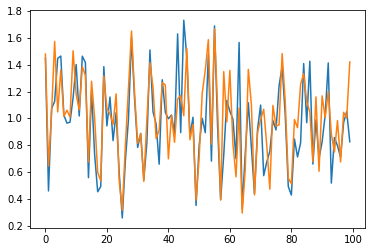

In [104]:
import matplotlib.pyplot as plt
plt.plot(y_test2[:100])
plt.plot(y_pred[:100])

In [105]:
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

,0,AH
0,1.48,1.45
1,0.65,0.46
2,1.04,1.07
3,1.57,1.13
4,1.05,1.45
...,...,...
771,1.02,1.00
772,0.39,0.41
773,0.82,0.77
774,1.39,1.72


In [106]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('PT08S4', 0.561490415745579),
 ('T', 0.28131251042145045),
 ('NO2GT', 0.15719707383297055)]

# Bayesian Estimation using pymc3 module

In [107]:
from pymc3 import Model, Uniform, Normal, Gamma

with Model() as absoluteHumidity:
    alpha = Uniform('alpha', 0, 10)
    beta = Uniform('beta', 0, 20)

In [108]:
with absoluteHumidity:    
    y = Gamma('y', alpha = alpha, beta = beta, observed=dfSQforAnalysis["AH"]) #likelihood

In [109]:
from pymc3 import fit
RANDOM_SEED = 20090425

with absoluteHumidity:

    samplesGamma1 = fit(random_seed=RANDOM_SEED).sample(500)

Average Loss = 1,663.8: 100%|██████████| 10000/10000 [00:08<00:00, 1242.06it/s]
Finished [100%]: Average Loss = 1,662.9


In [110]:
alphas = samplesGamma1['alpha']
betas = samplesGamma1['beta']

In [111]:
humidSample = Gamma.dist(alpha = alphas, beta = betas).random()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


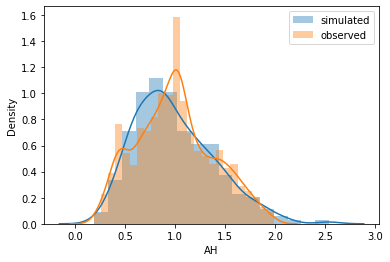

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(humidSample, label='simulated')
sns.distplot(dfSQforAnalysis["AH"], label='observed')
plt.legend()

# using Linear algebra multivariate distribution


In [113]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('AH ~ PT08S4 + NO2GT + T',
                            dfSQforAnalysis,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag', cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, T, NO2GT, PT08S4, Intercept]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:19<00:00, 102.15it/s]


/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f6924b950>,
      dtype=object)

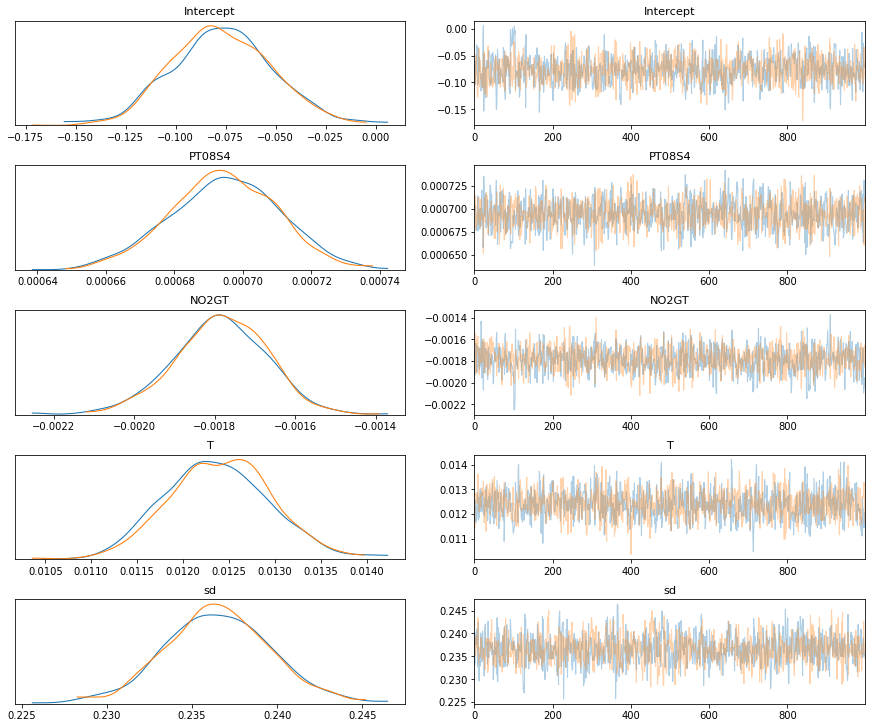

In [114]:
import arviz as arviz
arviz.plot_trace(trace2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f695bd2d0>,
      dtype=object)

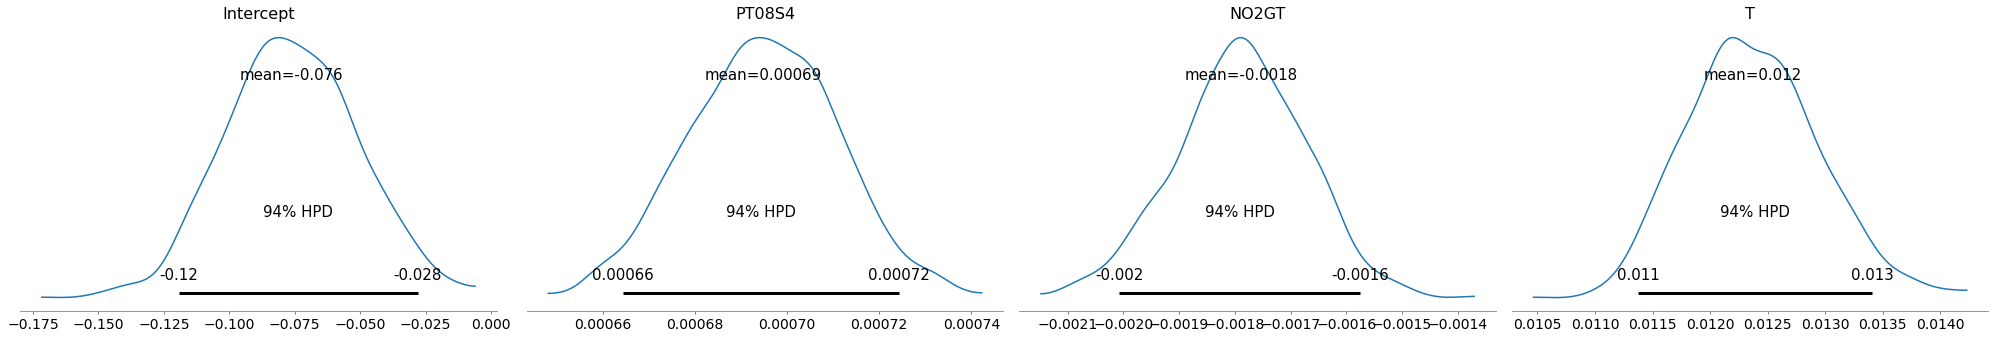

In [115]:
arviz.plot_posterior(trace2[500:], var_names=['Intercept', 'PT08S4', 'NO2GT', 'T'])

## Conclusion 
Using above model I analysed the real time data that was recorded in Italy and analyzed on what harmful chemicals are actually effecting our Humidity. The metallic oxides that significantly effect the environment was the Tungton oxides along with little considerable effect of Temparature